In [90]:
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.feature_selection import SelectKBest
import numpy as np
import csv
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Clustering Documents #
### Reading in the DTM ###
First we'll read in the DTM from a CSV. For now, I'm using a placeholder DTM with uncleaned data (i.e. still has stopwords, not normalized, etc.).

In [2]:
#Read in list of words
with open('dtm_placeholder.csv', 'rb') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        words = row
        break

In [42]:
words[:10]

['(X)[nan]nan',
 '1-kam-ma[1st]NU',
 '1/2[1/2]NU',
 '1/3[1/3]NU',
 '10-kam-ma[10th]NU',
 '1000[1000]NU',
 '100[100]NU',
 '108000[108000]NU',
 '1080[1080]NU',
 '108[108]NU',
 '10[10]NU',
 '11-kam-ma[11th]NU',
 '110[110]NU',
 '1110[1110]NU',
 '116[116]NU',
 '117[117]NU',
 '11[11]NU',
 '12-kam-ma[12th]NU',
 '1200[1200]NU',
 '120[120]NU',
 '123[123]NU',
 '124[124]NU',
 '125[125]NU',
 '126[126]NU',
 '12[12]NU',
 '131[131]NU',
 '1320[1320]NU',
 '132[132]NU',
 '134[134]NU',
 '136[136]NU',
 '137[137]NU',
 '139[139]NU',
 '13[13]NU',
 '140[140]NU',
 '14400[14400]NU',
 '144[144]NU',
 '14[14]NU',
 '15-kam-ma[15th]NU',
 '1500[1500]NU',
 '1525[1525]NU',
 '1560[1560]NU',
 '157[157]NU',
 '159[159]NU',
 '15[15]NU',
 '160[160]NU',
 '161[161]NU',
 '1620[1620]NU',
 '16[16]NU',
 '171[171]NU',
 '177[177]NU',
 '17[17]NU',
 '1800[1800]NU',
 '180[180]NU',
 '181[181]NU',
 '184[184]NU',
 '18600[18600]NU',
 '187[187]NU',
 '18[18]NU',
 '195[195]NU',
 '197[197]NU',
 '1[1]NU',
 '2-kam-ma[2nd]NU',
 '2/3[2/3]NU',
 '20

In [3]:
#Read in rest of DTM
dtm = np.loadtxt('dtm_placeholder.csv', delimiter=',', skiprows=1)

### K-Means Clustering ###
Let's try executing KMeans using 5 clusters, without doing anything to the DTM. I picked 5 arbitrarily - in the future we can try using the "elbow method" to determine a number of clusters, or we can try different options and manually inspect the clusters to see if they make any sense.

In [4]:
dtm_kmeans = KMeans(n_clusters=5, max_iter=1000).fit(dtm)

In [5]:
dtm_kmeans.labels_

array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4,

In [6]:
dtm_kmeans.cluster_centers_

array([[  8.67361738e-19,   0.00000000e+00,   4.75096527e-02, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  0.00000000e+00,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.26318458e-03,   1.80305950e-03,   2.15362002e-03, ...,
          8.20743515e-04,   1.46823100e-04,   1.53374213e-04]])

So we didn't get many interesting results. Most (99%) of the documents fell into the same cluster, and the cluster centers are very uninteresting for the most part. This was the same when I tried a whole variety of number of clusters.

Let's try normalizing all the vectors first and seeing what's different.

In [7]:
dtm_normalized = dtm.copy()
norms = np.linalg.norm(dtm, axis=1)

In [8]:
for i in range(len(dtm_normalized)):
    dtm_normalized[i] /= norms[i] #somehow I couldn't find an existing function for this...

In [33]:
dtm_normalized_kmeans = KMeans(n_clusters=8, max_iter=1000).fit(dtm_normalized)

In [34]:
labels = dtm_normalized_kmeans.labels_
labels

array([1, 4, 4, 4, 4, 4, 4, 5, 4, 4, 3, 4, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 0, 3, 4, 6, 6, 6, 4, 6, 4, 6, 4, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 4, 4, 3, 6, 6, 6, 6, 6, 6, 6, 6, 6, 2, 2, 6, 2, 4, 5, 4, 4,
       4, 4, 4, 6, 6, 6, 6, 6, 2, 4, 4, 4, 7, 2, 3, 2, 2, 4, 4, 4, 4, 4, 3,
       3, 7, 3, 4, 4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 1, 2, 1, 2, 2, 6, 7, 2,
       4, 6, 2, 2, 2, 7, 2, 4, 0, 6, 2, 2, 2, 7, 4, 2, 2, 7, 1, 2, 6, 2, 7,
       7, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 7, 2, 4, 7, 2, 2, 7, 7, 7, 7,
       7, 7, 7, 2, 7, 7, 4, 7, 7, 7, 4, 7, 7, 7, 7, 4, 7, 4, 1, 4, 2, 7, 7,
       4, 4, 2, 6, 6, 1, 1, 3, 3, 3, 1, 1, 1, 6, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       6, 1, 1, 1, 3, 6, 4, 6, 6, 4, 4, 4, 4, 4, 4, 7, 4, 4, 4, 4, 7, 4, 7,
       7, 4, 7, 7, 6, 4, 6, 6, 6, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 0,
       5, 0, 4, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 4, 0, 3, 0, 0, 4, 4, 5, 5,
       7, 5, 7, 5, 3, 2, 5, 4, 5, 2, 4, 4, 4, 7, 5, 4, 5, 6, 4, 4, 2, 2, 7,
       6, 4,

In [35]:
cluster_centers = dtm_normalized_kmeans.cluster_centers_
cluster_centers

array([[  7.00073619e-03,   6.05722564e-03,   0.00000000e+00, ...,
          4.33680869e-19,  -1.08420217e-19,   5.42101086e-20],
       [  1.54504863e-02,   1.45386083e-02,   0.00000000e+00, ...,
          4.33680869e-19,  -2.16840434e-19,   1.08420217e-19],
       [  1.24660187e-02,   2.18293617e-03,   8.67361738e-19, ...,
         -8.67361738e-19,  -5.42101086e-19,  -2.71050543e-19],
       ..., 
       [  9.17789555e-03,   5.87775239e-03,   0.00000000e+00, ...,
          4.33680869e-19,  -1.08420217e-19,   5.42101086e-20],
       [  1.04447343e-02,   3.35944492e-03,   1.29848649e-02, ...,
          1.92165696e-03,   2.01973643e-03,   4.98282751e-04],
       [  1.30250988e-02,   3.38730947e-03,   4.63987740e-04, ...,
         -6.50521303e-19,  -4.33680869e-19,  -2.71050543e-19]])

Much more interesting...

Below I now define a method that takes in a cluster number, and outputs a dictionary whose values are lists of documents that belong to a specific cluster. The idea is that someone familiar with this corpus could look at the output and determine if the clustering makes any sense whatsoever.

In [ ]:
def inspect_clusters(num_clusters):
    km = KMeans(n_clusters=num_clusters, max_iter=1000).fit(dtm_normalized)
    labels = km.labels_
    clusters = {}
    for i in range(num_clusters):
        docs = [j for j in range(len(labels)) if labels[j] == i]
        clusters[i] = docs
    return clusters

### K-Means Visualization ###
It's difficult to visualize the clustering of 4000+ dimension vectors.

I'll try feature selection - trying to pick out a couple of the most "significant" features (where features are terms in this case) and plot those features onto 2D or 3D graphs. Below we try two different selection criteria.

In [25]:
# gives the features with the largest magnitude (summed across given cluster centers)
def largest_selector(clusters, num_features):
    size = []
    for feat in range(len(clusters[0])):
        size.append((feat, sum([c[feat] for c in clusters])))
    size = sorted(size, key=lambda t: -t[1]) #size.sort(lambda x, y: x[1] > y[1])
    return size[:num_features]

In [26]:
# gives the features with the largest difference between cluster centers
def largest_diff_selector(clusters, num_features):
    tot_diff = []
    for feat in range(len(clusters[0])):
        #I know this overcounts but I'm lazy and it's still consistent so I'm leaving it
        tot_diff.append((feat, sum([abs(c1[feat] - c2[feat]) for c1 in clusters for c2 in clusters])))
    tot_diff = sorted(tot_diff, key=lambda t: -t[1])
    return tot_diff[:num_features]

In [36]:
largest_features = largest_selector(cluster_centers[:2], 20)
largest_diff_features = largest_diff_selector(cluster_centers[:2], 20)

In [37]:
largest_features = [f[0] for f in largest_features]
largest_diff_features = [f[0] for f in largest_diff_features]

In [38]:
selected_features = largest_features[:3]

In [43]:
for i in selected_features:
    print words[i]

Dumuzid[1]DN
ugnim[army]N
Išbierra[1]RN


Here, we've selected "Dumuzid[1]DN", "ugnim[army]N", and "Išbierra[1]RN" as three of the most significant terms when it comes to cluster 0 and cluster 1. Now we plot "Dumuzid[1]DN" as the x-axis, "ugnim[army]N" as the y-axis, and see where the clusters fall.

In [39]:
selected_dtm = dtm[:,selected_features]
mask = lambda i: [lbl == i for lbl in labels]
first_cluster = selected_dtm[mask(0)]
second_cluster = selected_dtm[mask(1)]

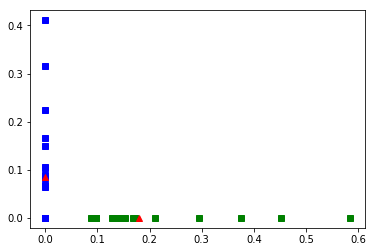

In [40]:
X0, Y0, Z0 = zip(*first_cluster)
X1, Y1, Z1 = zip(*second_cluster)
plt.plot(X0, Y0, 'gs')
plt.plot(X1, Y1, 'bs')
plt.plot([cluster_centers[0][selected_features[0]], cluster_centers[1][selected_features[0]]],\
         [cluster_centers[0][selected_features[1]], cluster_centers[1][selected_features[1]]], \
         'r^')
plt.show()

So we see that cluster 0 has varied tf-idf values across the first term but doesn't contain the second term, and vice versa for the cluster 1. 

Let's add "Išbierra[1]RN" as the z-axis

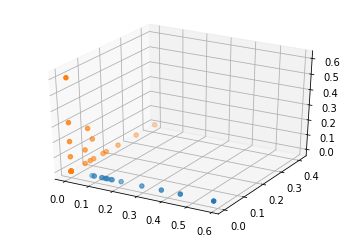

In [41]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X0, Y0, Z0)
ax.scatter(X1, Y1, Z1)
plt.draw()
plt.show()

We see that one of the clusters also has varying tf-idf values across the third term, whereas the other cluster does not.

### Hierarchical Clustering ###
We'll use "agglomerative clustering" here, where each document starts as a cluster, and the algorithm pairs up clusters until every document is part of a single cluster.

In [75]:
dtm_normalized_hierarchical = AgglomerativeClustering(8).fit(dtm_normalized)

In [76]:
dtm_normalized_hierarchical.n_leaves_

394L

In [102]:
hierarchical_labels = dtm_normalized_hierarchical.labels_
hierarchical_labels

array([4, 0, 7, 7, 7, 7, 0, 4, 4, 4, 0, 0, 6, 4, 4, 2, 2, 4, 2, 2, 2, 4, 2,
       2, 2, 2, 2, 2, 6, 0, 0, 2, 4, 4, 2, 4, 4, 4, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 4, 4, 4, 4, 2, 4, 2, 2, 2, 2, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 2, 2, 2, 2, 5, 0, 6, 2, 0, 0, 0, 0, 5, 0, 4, 2, 0, 6, 4,
       0, 4, 4, 6, 6, 5, 5, 5, 5, 5, 0, 2, 0, 0, 0, 4, 0, 0, 5, 5, 2, 2, 5,
       2, 2, 5, 0, 5, 0, 5, 0, 6, 0, 5, 0, 0, 0, 0, 5, 0, 0, 0, 0, 4, 0, 2,
       2, 5, 5, 0, 0, 5, 5, 5, 5, 5, 0, 5, 5, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4, 4, 4, 0, 0, 0,
       0, 0, 0, 4, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 4, 1, 1, 1, 1, 1, 1, 1, 1,
       4, 1, 1, 1, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4,
       0, 0, 0, 2, 4, 4, 2, 2, 6, 6, 4, 2, 0, 4, 4, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 0, 4, 0, 6, 6, 6, 6, 4, 4, 0, 2, 6, 0, 6, 6, 4, 6, 0, 0, 0, 4,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 2, 4, 4, 5, 5, 2,
       4, 0,

In [91]:
children = dtm_normalized_hierarchical.children_
children

array([[123, 271],
       [ 67,  68],
       [ 43,  44],
       [  2,   3],
       [146, 147],
       [ 56,  57],
       [208, 209],
       [ 61,  62],
       [  5, 397],
       [ 98,  99],
       [ 47,  48],
       [ 60, 399],
       [139, 140],
       [284, 321],
       [145, 398],
       [ 25,  27],
       [380, 384],
       [ 76, 116],
       [134, 136],
       [ 58, 405],
       [365, 368],
       [195, 196],
       [141, 310],
       [364, 391],
       [191, 193],
       [102, 104],
       [ 31,  59],
       [247, 268],
       [371, 378],
       [ 73, 411],
       [314, 315],
       [137, 138],
       [201, 202],
       [ 64,  69],
       [135, 176],
       [296, 297],
       [149, 150],
       [303, 304],
       [110, 114],
       [159, 161],
       [100, 403],
       [ 96, 249],
       [ 15,  16],
       [ 45,  46],
       [143, 144],
       [375, 385],
       [367, 417],
       [ 28, 261],
       [ 97, 434],
       [131, 412],
       [ 75,  88],
       [204, 206],
       [121,

### Hierarchical Visualization ###
Let's draw a dendrogram! Here we're going to use scipy's function.

In [93]:
Z = linkage(dtm_normalized)

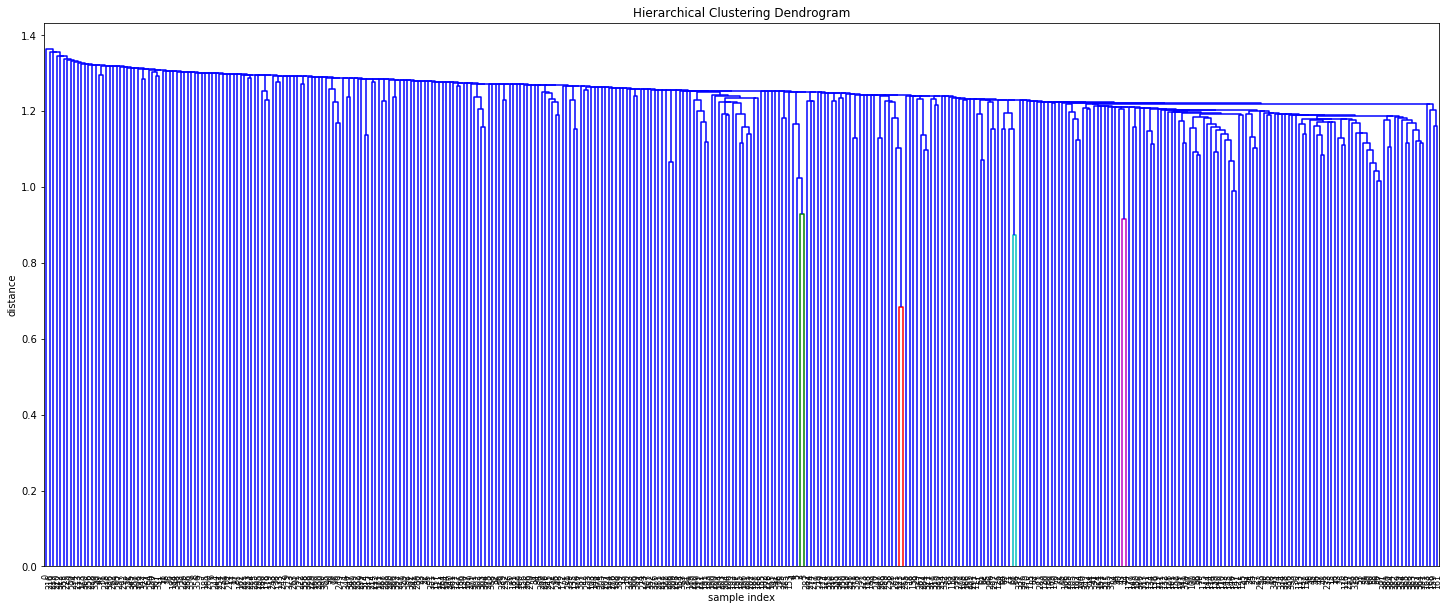

In [96]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()

This is way too crowded, since it has all 394 documents. Let's try it on some subset of the documents - maybe the ones from a specific cluster.


In [103]:
# select only documents from one of the clusters
selected_hierarchical = dtm[[i for i in range(len(hierarchical_labels)) if hierarchical_labels[i] == 0]]

In [105]:
Z2 = linkage(selected_hierarchical)

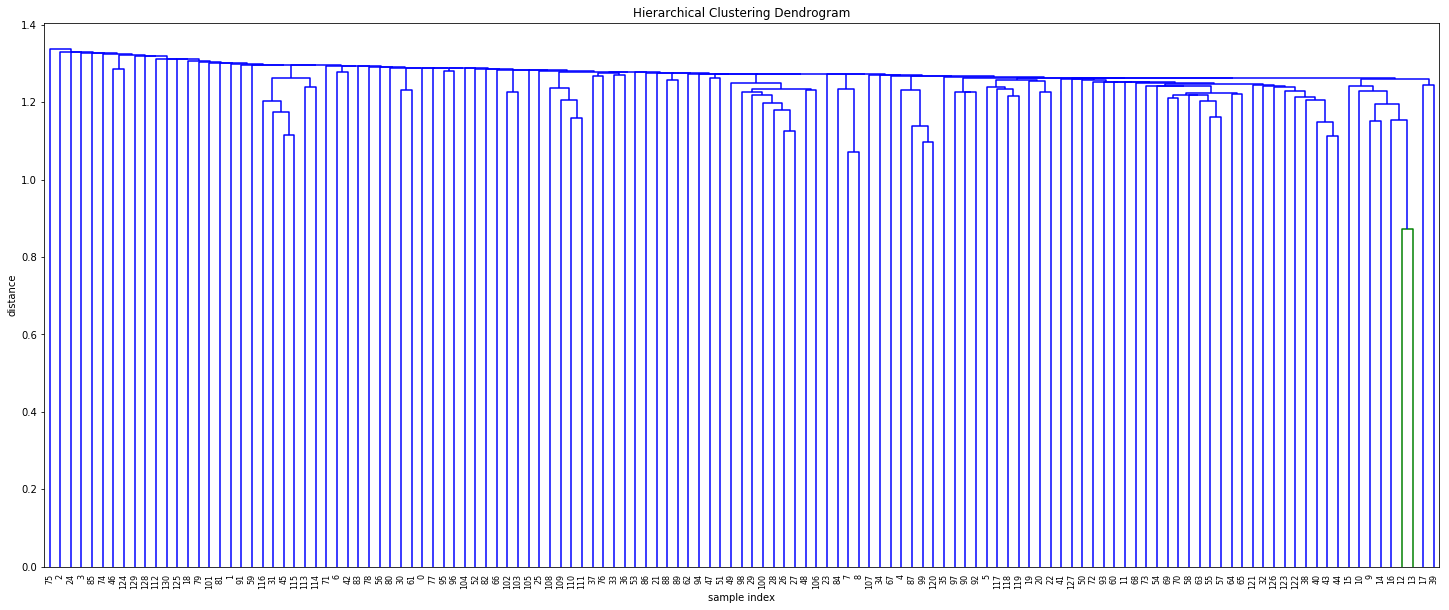

In [106]:
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
    Z2,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
)
plt.show()